# K-Means Clustering exercise 2

## Problem Statement

To Perform color compression on images using K-Means algorithm

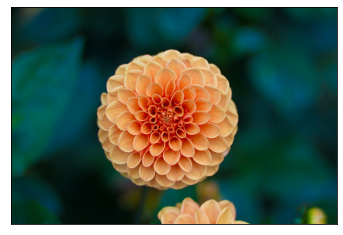

In [2]:
# Importing libraries
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
flower = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [3]:
# Number of xpixels, ypixels and number of layers (3 for rgb)
flower.shape

(427, 640, 3)

In [4]:
data = flower / 255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [5]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [10]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Choose a randon subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20);

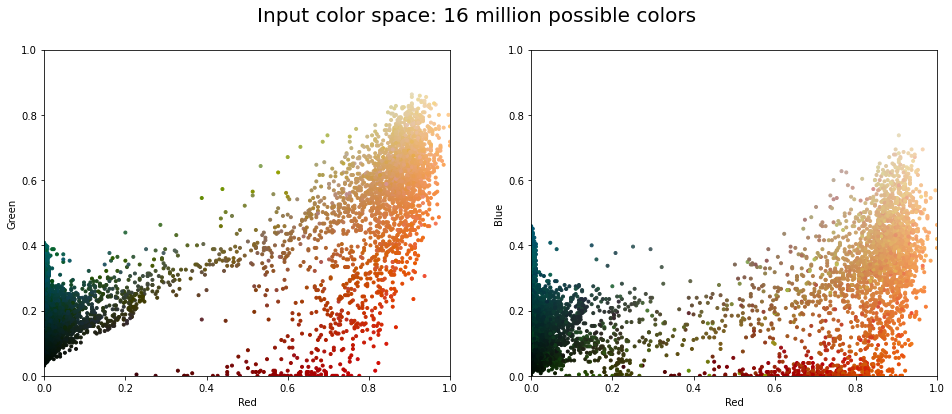

In [11]:
plot_pixels(data, title='Input color space: 16 million possible colors')

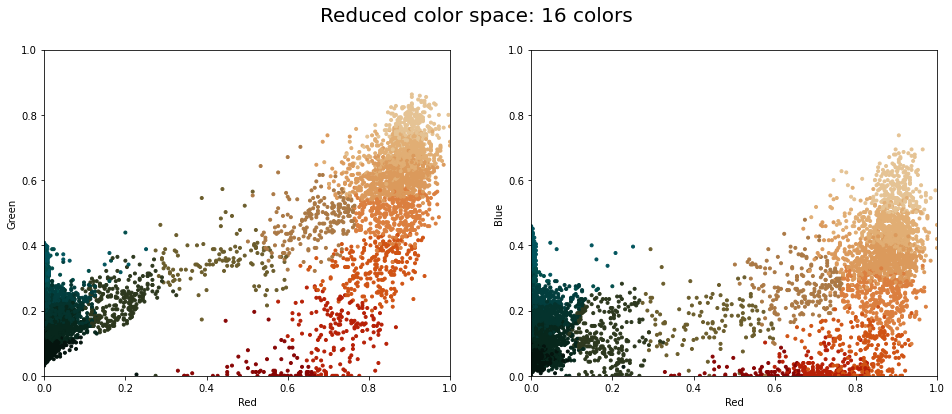

In [17]:
import warnings; warnings.simplefilter('ignore') # Fix Numpy issues

from sklearn.cluster import MiniBatchKMeans
kmeans= MiniBatchKMeans(16)
kmeans.fit(data)
new_colors= kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
           title='Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

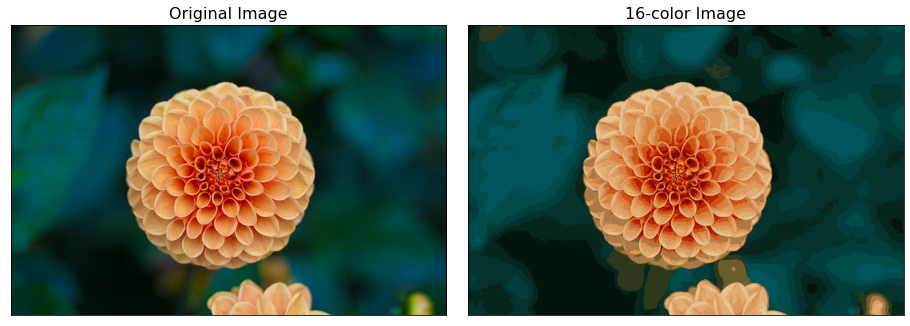

In [20]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax= plt.subplots(1, 2, figsize=(16,6),
                    subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16)